Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None

First 5 Rows of Dataset:
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

Missing Values:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: in

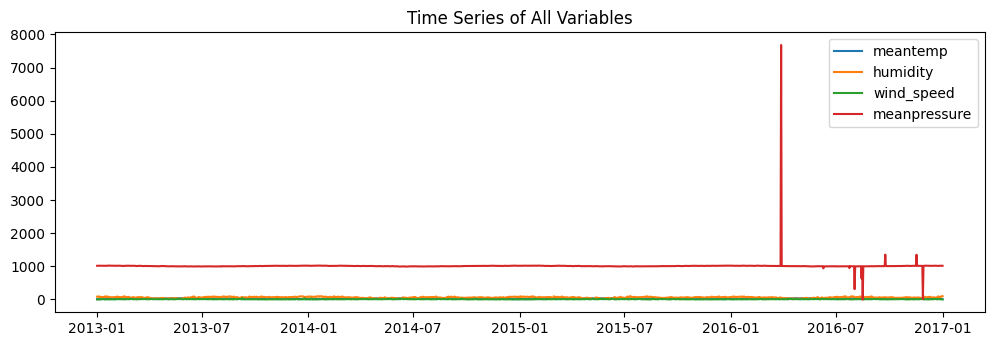

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
test_data = pd.read_csv('/content/DailyDelhiClimateTest.csv')

print("Dataset Information:")
print(train_data.info())

print("\nFirst 5 Rows of Dataset:")
print(train_data.head())

missing_values = train_data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

print("\nDataset Statistics:")
print(train_data.describe())

train_data['date'] = pd.to_datetime(train_data['date'])

# Time Series Visualization
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for col in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
    plt.plot(train_data['date'], train_data[col], label=col)
plt.title("Time Series of All Variables")
plt.legend()

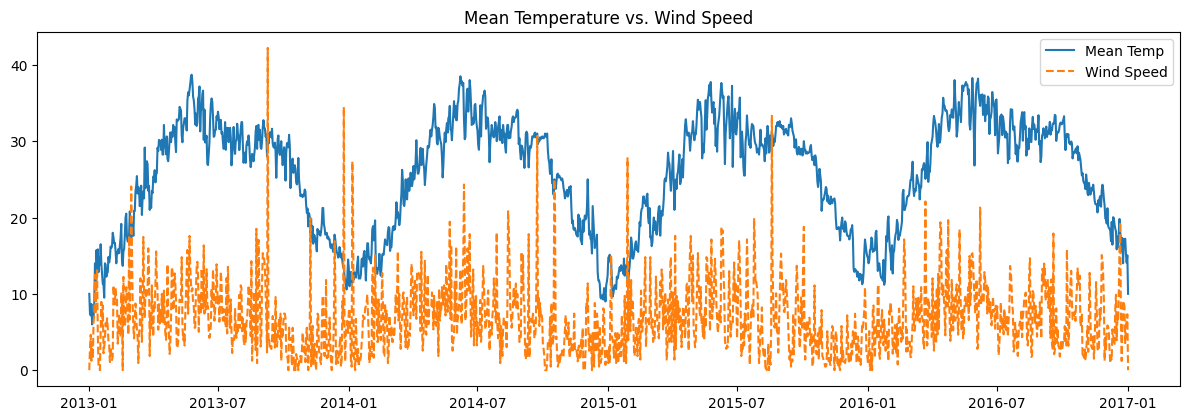

In [9]:
# Subplots for temperature and wind speed
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(train_data['date'], train_data['meantemp'], label='Mean Temp')
plt.plot(train_data['date'], train_data['wind_speed'], label='Wind Speed', linestyle='--')
plt.title("Mean Temperature vs. Wind Speed")
plt.legend()

plt.tight_layout()
plt.show()

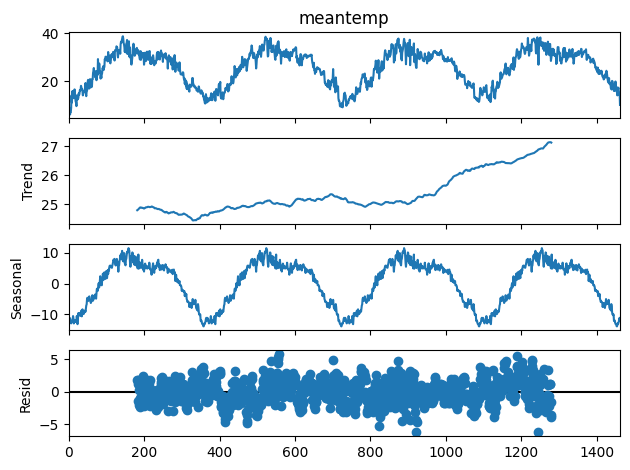

Seasonal Patterns Observed:
Trend, seasonal, and residual components decomposed and visualized.


In [14]:
# Decompose the time series for daily mean temperature
decomposition = seasonal_decompose(train_data['meantemp'], period=365, model='additive')
decomposition.plot()
plt.show()

# Seasonal patterns significance
print("Seasonal Patterns Observed:")
print("Trend, seasonal, and residual components decomposed and visualized.")


In [20]:
# Forecasting
forecast_var = 'meantemp'
train_data = train_data[['date', forecast_var]].dropna()

train_size = int(len(train_data) * 0.8)
train = train_data.iloc[:train_size]
test = train_data.iloc[train_size:]

stl_decomposition = seasonal_decompose(train[forecast_var], period=365, model='additive')

trend = stl_decomposition.trend.dropna()
seasonal = stl_decomposition.seasonal.dropna()

forecast = trend + seasonal
forecast = forecast.dropna()
forecast = forecast.iloc[-len(test):]
# Align the test data to the forecast
test_actual = test[forecast_var].iloc[-len(forecast):]

forecast = forecast.ffill()
test_actual = test_actual.ffill()

# Evaluation
mae = mean_absolute_error(test_actual, forecast)
rmse = np.sqrt(mean_squared_error(test_actual, forecast))

print("\nForecasting Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")



Forecasting Evaluation Metrics:
Mean Absolute Error (MAE): 10.070152037305071
Root Mean Squared Error (RMSE): 12.294939446850988
